In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

import pickle


# Creating the Training Data

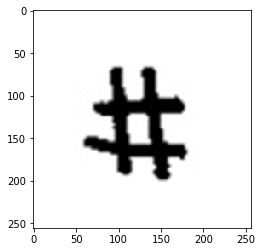

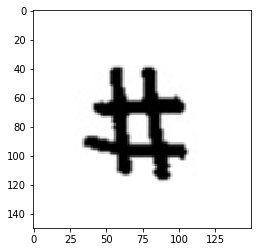

100%|████████████████████████████████████████████████████████████████████████████████| 361/361 [00:03<00:00, 93.68it/s]


6562


In [3]:


DATADIR = "C:\\Users\\Josh\Desktop\\Thesis Data\\Extracted"


CATEGORIES = ["Sharp", "Flat","Minim","8thRest","16thRest","32ndRest","Accent","AltoClef",
              "BassClef","Beam1","Crochet", "Natural","QuarterRest",
             "Quaver","Slur","Staccatissimo","Ties","TrebleClef"]


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
    
    
    
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

import random

random.shuffle(training_data)

# Splitting the Training Data

In [4]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


# Saving the Training Data 

In [5]:

#SAVING VALUES
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()



#  Inserting Values to the Neural Network 

In [2]:

##LOADING VALUES
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

##CNN
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(64))

model.add(Dense(18))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, epochs=2)

model.save('FullClassifier.model')

Epoch 1/2
6528/6562 [============================>.] - ETA: 35:46 - loss: 2.9032 - acc: 0.0000e+ - ETA: 32:48 - loss: 5.8770 - acc: 0.0156   - ETA: 32:00 - loss: 6.8534 - acc: 0.04 - ETA: 31:21 - loss: 7.1251 - acc: 0.03 - ETA: 30:51 - loss: 6.4875 - acc: 0.05 - ETA: 30:31 - loss: 5.8689 - acc: 0.06 - ETA: 30:18 - loss: 5.4269 - acc: 0.07 - ETA: 30:24 - loss: 5.0952 - acc: 0.07 - ETA: 30:17 - loss: 4.8520 - acc: 0.07 - ETA: 30:09 - loss: 4.6257 - acc: 0.09 - ETA: 29:47 - loss: 4.4330 - acc: 0.09 - ETA: 29:27 - loss: 4.2726 - acc: 0.10 - ETA: 29:08 - loss: 4.1332 - acc: 0.11 - ETA: 28:53 - loss: 4.0209 - acc: 0.11 - ETA: 28:40 - loss: 3.8897 - acc: 0.13 - ETA: 28:26 - loss: 3.7868 - acc: 0.15 - ETA: 28:13 - loss: 3.6867 - acc: 0.16 - ETA: 28:00 - loss: 3.5679 - acc: 0.18 - ETA: 27:47 - loss: 3.4675 - acc: 0.19 - ETA: 27:37 - loss: 3.3745 - acc: 0.21 - ETA: 27:26 - loss: 3.2819 - acc: 0.23 - ETA: 27:15 - loss: 3.2012 - acc: 0.24 - ETA: 27:02 - loss: 3.1440 - acc: 0.25 - ETA: 26:50 - loss

6560/6562 [============================>.] - ETA: 28:25 - loss: 0.1801 - acc: 0.93 - ETA: 28:23 - loss: 0.2139 - acc: 0.92 - ETA: 28:16 - loss: 0.2304 - acc: 0.90 - ETA: 28:13 - loss: 0.2380 - acc: 0.90 - ETA: 28:04 - loss: 0.2418 - acc: 0.90 - ETA: 27:54 - loss: 0.2896 - acc: 0.90 - ETA: 27:46 - loss: 0.2788 - acc: 0.91 - ETA: 27:38 - loss: 0.2699 - acc: 0.91 - ETA: 27:29 - loss: 0.2639 - acc: 0.91 - ETA: 27:20 - loss: 0.2511 - acc: 0.91 - ETA: 27:12 - loss: 0.2341 - acc: 0.92 - ETA: 27:04 - loss: 0.2268 - acc: 0.92 - ETA: 26:56 - loss: 0.2200 - acc: 0.93 - ETA: 26:47 - loss: 0.2187 - acc: 0.93 - ETA: 26:39 - loss: 0.2108 - acc: 0.93 - ETA: 26:30 - loss: 0.2248 - acc: 0.93 - ETA: 26:22 - loss: 0.2217 - acc: 0.93 - ETA: 26:16 - loss: 0.2127 - acc: 0.93 - ETA: 26:08 - loss: 0.2149 - acc: 0.93 - ETA: 26:01 - loss: 0.2146 - acc: 0.93 - ETA: 25:56 - loss: 0.2094 - acc: 0.94 - ETA: 25:48 - loss: 0.2054 - acc: 0.94 - ETA: 25:39 - loss: 0.2018 - acc: 0.94 - ETA: 25:30 - loss: 0.1994 - acc: 0.

6562/6562 [==============================] - 1727s 263ms/step - loss: 0.1461 - acc: 0.9592


# Classification Preperation

In [3]:
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.



# Loading Neural Model

In [4]:
model = tf.keras.models.load_model('FullClassifier.model') 

# Classification of Input

In [35]:

CATEGORIES = ["Sharp", "Flat","Minim","8thRest","16thRest","32ndRest","Accent","AltoClef",
              "BassClef","Beam1","Crochet","Natural","QuarterRest",
             "Quaver","Slur","Staccatissimo","Ties","TrebleClef"]

prediction = model.predict([prepare(r'C:\Users\Josh\Desktop\Thesis Data\randomsquiggle.bmp')]) 
predictionproba = model.predict_proba([prepare(r'C:\Users\Josh\Desktop\Thesis Data\randomsquiggle.bmp')]) 



In [53]:

val_loss, val_acc = model.evaluate(X,y)

vl = round(val_loss,3) 
va = round(val_acc,3) 



6562/6562 [==============================] - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 

In [7]:
print("The predicted category the image belongs to is: " + str(prediction[0]))

The predicted category the image belongs to is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
a = np.array(prediction[0], dtype=np.int)
i=0
while i<len(CATEGORIES):
    if a[i] == 1:
        print("The classified image is a: " + CATEGORIES[i])
        i += 1
    else:
        i += 1



#print("\n\nThe value loss of the classified image is: " + str(vl) + "%" + "\nWhile the accuracy is: " + "%" + str(va))

The classified image is a: TrebleClef


In [ ]:

        
#print(prediction )
#print(a)

val_loss = vl * 100
val_accuracy = va * 100
print("Validation Loss: " + str(val_loss) + "%")
print("Validation Accuracy: " + str(val_accuracy) + "%")
vl = round(val_loss,3) * 100
va = round(val_acc,3) * 100